In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

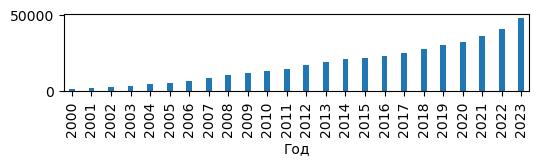

In [67]:
# Средняя зарплата в Кировской области
# https://43.rosstat.gov.ru/folder/24297
salary = [
    [2000, 1521.7],
    [2001, 2121.5],
    [2002, 2928.6],
    [2003, 3640.9],
    [2004, 4540.6],
    [2005, 5695.8],
    [2006, 6960.3],
    [2007, 8861.5],
    [2008, 10971],
    [2009, 12053.9],
    [2010, 13292.6],
    [2011, 14579],
    [2012, 16932.3],
    [2013, 19291],
    [2014, 20978],
    [2015, 22118],
    [2016, 23404],
    [2017, 25215],
    [2018, 27932],
    [2019, 30213],
    [2020, 32692],
    [2021, 36143],
    [2022, 40833],
    [2023, 48258],
]
salary = pd.DataFrame(data = salary,columns = ['Год','Средняя зарплата']).set_index('Год')

salary.plot(figsize=(6,1),kind='bar',width=0.3, legend=False);

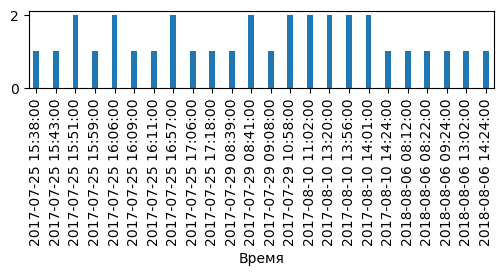

In [66]:
columns = ['Время','Размер']
fish = [ 
    ['25.07.2017 15:38', 1],
    ['25.07.2017 15:43', 1],
    ['25.07.2017 15:51', 2],
    ['25.07.2017 15:59', 1],
    ['25.07.2017 16:06', 2],
    ['25.07.2017 16:09', 1],
    ['25.07.2017 16:11', 1],
    ['25.07.2017 16:57', 2],
    ['25.07.2017 17:06', 1],
    ['25.07.2017 17:18', 1],
    ['29.07.2017 8:39', 1],
    ['29.07.2017 8:41', 2],
    ['29.07.2017 9:08', 1],
    ['29.07.2017 10:58', 2],
    ['06.08.2018 13:02', 1],
    ['06.08.2018 8:12', 1],
    ['06.08.2018 8:22', 1],
    ['06.08.2018 9:24', 1],
    ['06.08.2018 14:24', 1],
    ['10.08.2017 11:02', 2],
    ['10.08.2017 13:20', 2],
    ['10.08.2017 13:56', 2],
    ['10.08.2017 14:01', 2],
    ['10.08.2017 14:24', 1],
]
fish = pd.DataFrame(data =fish, columns=columns)
fish['Время'] = pd.to_datetime(fish['Время'],format='%d.%m.%Y %H:%M')
fish = fish.set_index('Время').sort_index()
fish.plot(figsize=(6,1),kind='bar',width=0.3, legend=False);

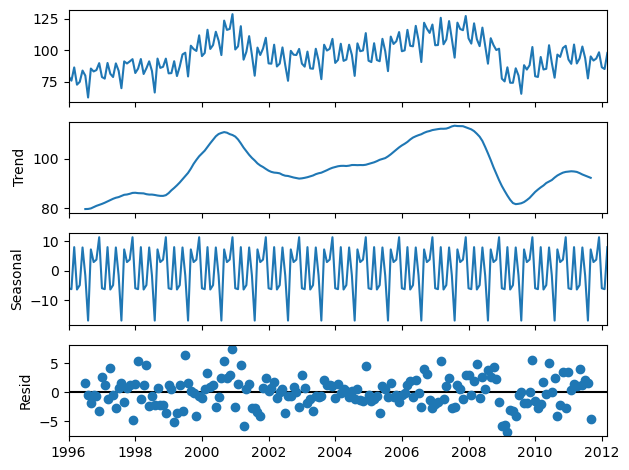

In [86]:
from statsmodels.tsa.seasonal \
    import seasonal_decompose
elecequip = pd.read_csv(
    'https://github.com/antoinecarme/TimeSeriesData/raw/refs/heads/master/fpp2/elecequip.csv'
    ).set_index('Index')

decompose = seasonal_decompose(elecequip, model = 'additive', period=12)
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

decompose.plot();

In [ ]:
elecequip['SMA-3'] = elecequip['x'].rolling(3, center=False).mean()
elecequip['SMA-12'] = elecequip['x'].rolling(12, center=False).mean()
elecequip['SMA-12C'] = elecequip['x'].rolling(12, center=True).mean()

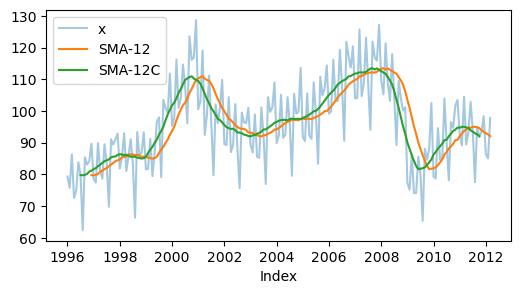

In [94]:
plt.figure(figsize=(6,3))
elecequip['x'].plot(alpha=0.4)
elecequip['SMA-12'].plot()
elecequip['SMA-12C'].plot()
plt.legend()

In [ ]:
elecequip['x']

Index
1996.000000    79.35
1996.083333    75.78
1996.166667    86.32
1996.250000    72.60
1996.333333    74.86
               ...  
2011.833333    93.37
2011.916667    98.34
2012.000000    86.44
2012.083333    85.04
2012.166667    97.80
Name: x, Length: 195, dtype: float64

<Axes: xlabel='Index'>

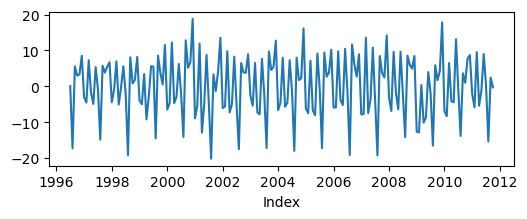

In [101]:
plt.figure(figsize=(6,2))
elecequip['detrend'] = (elecequip['x']-elecequip['SMA-12C'])
elecequip['detrend'].plot()

In [112]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
oildata = [ # тыс.барр./сутки
    [1980, 9900.2],
    [1981, 9814.9],
    [1982, 6483.0],
    [1983, 5085.9],
    [1984, 4663.2],
    [1985, 3387.8],
    [1986, 4870.0],
    [1987, 4265.0],
    [1988, 5086.0],
    [1989, 5064.2],
    [1990, 6410.0],
    [1991, 8115.2],
    [1992, 8216.2],
    [1993, 7959.0],
    [1994, 7898.5],
    [1995, 7936.5],
    [1996, 7908.0],
    [1997, 8083.7],
    [1998, 8092.1],
    [1999, 7519.8],
    [2000, 7997.3],
    [2001, 7697.6],
    [2002, 7379.7],
    [2003, 8765.9],
    [2004, 8993.7],
    [2005, 9779.9],
    [2006, 9642.1],
    [2007, 9190.1],
    [2008, 9261.3],
    [2009, 8250.1],
    [2010, 8417.0],
    [2011, 9620.3],
    [2012, 9996.6],
    [2013, 9872.9],
    [2014, 9905.3],
    [2015, 10335.6],
    [2016, 10634.7],
    [2017, 10305.4],
    [2018, 10598.1],
    [2019, 9980.9],
    [2020, 9405.7],
    [2021, 9313.1],
    [2022, 10644.4],
    [2023, 9733.5],
]

oildata = pd.DataFrame(oildata,columns=['Год','Объем']).set_index('Год')